# Ml Assignment 2
## Yash S Sankh
## Roll no 52
Title : Classify the email using the binary classification method. Email Spam detection has two
states: a) Normal State – Not Spam, b) Abnormal State – Spam. Use K-Nearest Neighbors and
Support Vector Machine for classification. Analyze their performance.
Dataset link: The emails.csv dataset on the Kaggle
https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

## Libraries and classes

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("emails.csv")

In [3]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [5]:
X = df.iloc[:,1:3001]
X

,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


## Count plot of y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64
(5172, 3000)
AxesSubplot(0.125,0.11;0.775x0.77)
0    3672
1    1500
Name: Prediction, dtype: int64


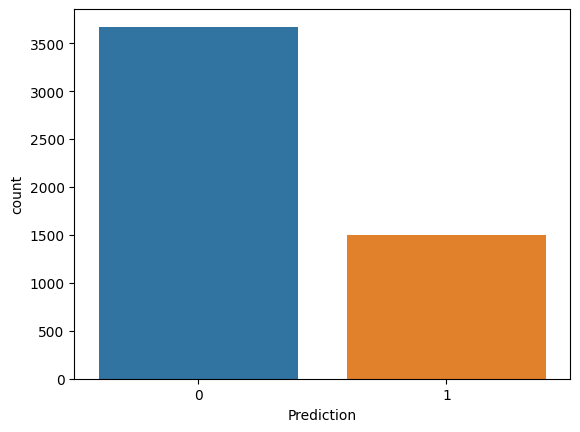

In [6]:
x=df.drop(["Email No.","Prediction"],axis=1)
y=df["Prediction"]
print(y)
print(x.shape)
print(sns.countplot(x=y))
print(y.value_counts())

## Scaling of values using min-max scaling technique

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [8]:
Y = df.iloc[:,-1].values
Y

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

## Spliting of dataset in train and test dataset

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,random_state=0,test_size = 0.25)
print(x_scaled.shape)
print(x_train.shape)
print(x_test.shape)

(5172, 3000)
(3879, 3000)
(1293, 3000)


## Model training using KNN algo.

In [10]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [11]:
y_pred=knn.predict(x_test)
print(y_pred)

[1 0 0 ... 1 0 1]


## Performance measure of model

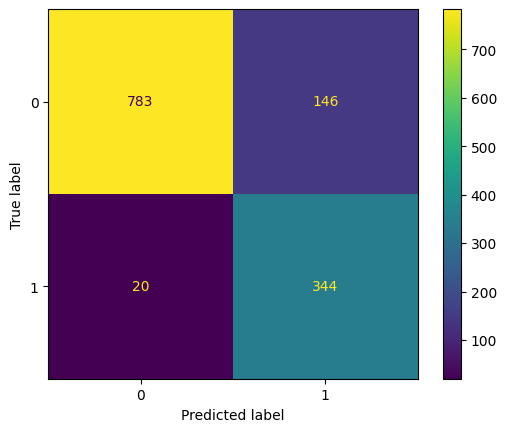

In [12]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [13]:
y_test.value_counts()

0    929
1    364
Name: Prediction, dtype: int64

In [14]:
accuracy_score(y_test,y_pred)

0.871616395978345

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       929
           1       0.70      0.95      0.81       364

    accuracy                           0.87      1293
   macro avg       0.84      0.89      0.85      1293
weighted avg       0.90      0.87      0.88      1293



In [16]:
error=[]
for k in range(1,41):
    knn=KNeighborsClassifier(n_neighbors=5)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    error.append(np.mean(pred!=y_test))
error

[0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508,
 0.12838360402165508]

## Support vector machine model 

In [17]:
svc = SVC(C=1.0,kernel='rbf',gamma='auto')         
# C here is the regularization parameter. Here, L2 penalty is used(default). It is the inverse of the strength of regularization.
# As C increases, model overfits.
# Kernel here is the radial basis function kernel.
# gamma (only used for rbf kernel) : As gamma increases, model overfits.
svc.fit(x_train,y_train)
y_pred2 = svc.predict(x_test)
print("Accuracy Score for SVC : ", accuracy_score(y_pred,y_test))

Accuracy Score for SVC :  0.871616395978345


In [18]:
svc = SVC(C=1.0,kernel='linear',gamma='auto')         

svc.fit(x_train,y_train)
y_pred2 = svc.predict(x_test)
print("Accuracy Score for SVC : ", accuracy_score(y_pred,y_test))

Accuracy Score for SVC :  0.871616395978345


In [19]:
svc = SVC(C=1.0,kernel='poly',gamma='auto')         

svc.fit(x_train,y_train)
y_pred2 = svc.predict(x_test)
print("Accuracy Score for SVC : ", accuracy_score(y_pred,y_test))

Accuracy Score for SVC :  0.871616395978345
